# British Airways Airline Review

Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.

This project is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present meaningful insights.

Real data was scrapped from skytrax website. The data scrapped is very messy and contains purely text. Data cleaning was performed in order to prepare the data for analysis and uncover insights. 

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

### Scraping data from Skytrax

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Have no fear when your BA f...
1,Not Verified | We have flown BA five times fr...
2,✅ Trip Verified | London Heathrow to Istanbul...
3,"Not Verified | Jan 30th, I booked a last-minut..."
4,✅ Trip Verified | I am a British Airways Gold ...


The dataset for this task is saved as a pandas dataframe df. The loops above collected 1000 reviews by iterating through the paginated pages on the skytrax website.

In [5]:
df.to_csv("BA_reviews.csv")

## Data Cleaning

### check for missing data

In [6]:
missing_data = df.isnull()

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

reviews
False    1000
Name: reviews, dtype: int64



In [8]:
split_text = df["reviews"].str.split("|")

In [9]:
split_text

0      [✅ Trip Verified ,   Have no fear when your BA...
1      [Not Verified ,   We have flown BA five times ...
2      [✅ Trip Verified ,   London Heathrow to Istanb...
3      [Not Verified ,  Jan 30th, I booked a last-min...
4      [✅ Trip Verified ,  I am a British Airways Gol...
                             ...                        
995    [✅ Trip Verified ,   Gatwick to St Lucia retur...
996    [✅ Trip Verified ,   It's been many years sinc...
997    [✅ Trip Verified ,  \r\nLondon Heathrow / Pisa...
998    [✅ Trip Verified ,  Edinburgh to Boston via Lo...
999    [✅ Trip Verified ,   Gatwick to Mauritius. My ...
Name: reviews, Length: 1000, dtype: object

In [10]:
df_clean = split_text.str[1].str.lstrip()

In [11]:
df_clean

0      Have no fear when your BA flight is operated b...
1      We have flown BA five times from western USA t...
2      London Heathrow to Istanbul at the start of th...
3      Jan 30th, I booked a last-minute, transatlanti...
4      I am a British Airways Gold Guest List member ...
                             ...                        
995    Gatwick to St Lucia return. Recently returned ...
996    It's been many years since I flew long haul Br...
997    London Heathrow / Pisa return. My wife and I f...
998    Edinburgh to Boston via London. The planes are...
999    Gatwick to Mauritius. My wife and 2 friends bo...
Name: reviews, Length: 1000, dtype: object

In [12]:
df_clean.to_csv("BA_reviews_Clean.csv")

## Sentiment Analysis

In [16]:
example = df_clean[50]
print(example)

Dear Community I feel compelled to share the utter frustration and disappointment that defined my recent travel experience with British Airways. Buckle up, folks; this one's a rollercoaster. On July 16 and 17, 2023, I had the displeasure of flying with British Airways on BA709 and BA7, and let me tell you, it was a nightmare. The initial flight from Zurich (ZRH) to London (LHR) on BA709 faced a seemingly unavoidable one-hour delay upon arrival at LHR. This, of course, resulted in me missing my connection to Tokyo, triggering an automatic rescheduling of my flight to Tokyo (HND) via Beijing with Air China. Oh, but the fun didn't stop there — flight CA183 was also delayed, turning my 16-hour delay into a grand total of 23 hours, finally arriving in Tokyo at 23:00 instead of the promised 7:10. And the cherry on top? My four checked-in suitcases decided to take a detour and didn't join me in Tokyo, forcing me to waste an additional two hours filling out forms at the baggage center. I final

In [5]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm

In [19]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Dear',
 'Community',
 'I',
 'feel',
 'compelled',
 'to',
 'share',
 'the',
 'utter',
 'frustration']

## Using NLTK VADER sentiment scoring

Here, nltk SentimentIntensityAnalyzer is used to get the neg/neu/pos scores of the text.

- This  uses bag of words approach
- 1. stop words are removed.
- 2. each word is scored and combined to a total score

## Preprocessing function

In [6]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())

    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text


# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['compound'] > 0 else 0

    return sentiment

In [26]:
df_saved = pd.read_csv("BA_reviews_Clean.csv")
df_saved

,Unnamed: 0,reviews
0,0,Have no fear when your BA flight is operated b...
1,1,We have flown BA five times from western USA t...
2,2,London Heathrow to Istanbul at the start of th...
3,3,"Jan 30th, I booked a last-minute, transatlanti..."
4,4,I am a British Airways Gold Guest List member ...
...,...,...
995,995,Gatwick to St Lucia return. Recently returned ...
996,996,It's been many years since I flew long haul Br...
997,997,London Heathrow / Pisa return. My wife and I f...
998,998,Edinburgh to Boston via London. The planes are...


In [27]:
df_saved['reviews'] = df_saved['reviews'].apply(preprocess_text)
df_saved

,Unnamed: 0,reviews
0,0,fear ba flight operated finnair . business cla...
1,1,flown ba five time western usa england . alway...
2,2,london heathrow istanbul start half-term schoo...
3,3,"jan 30th , booked last-minute , transatlantic ..."
4,4,british airway gold guest list member ( lifeti...
...,...,...
995,995,gatwick st lucia return . recently returned tw...
996,996,'s many year since flew long haul british airw...
997,997,london heathrow / pisa return . wife fly route...
998,998,edinburgh boston via london . plane ancient ne...


In [123]:
# apply get_sentiment function

df_saved['sentiment'] = df_saved['reviews'].apply(get_sentiment)

df_saved

,Unnamed: 0,reviews,sentiment
0,0,fear ba flight operated finnair . business cla...,1
1,1,flown ba five time western usa england . alway...,0
2,2,london heathrow istanbul start half-term schoo...,1
3,3,"jan 30th , booked last-minute , transatlantic ...",0
4,4,british airway gold guest list member ( lifeti...,1
...,...,...,...
995,995,gatwick st lucia return . recently returned tw...,0
996,996,'s many year since flew long haul british airw...,1
997,997,london heathrow / pisa return . wife fly route...,1
998,998,edinburgh boston via london . plane ancient ne...,0


### Get the Pos,Neg and Neutral Sentiment values

In [146]:
df_saved.to_csv("tokenize.csv")

In [7]:
df_token = pd.read_csv("tokenize.csv")


In [8]:
res = {}
for i in df_token['id']:
    text = df_token['reviews'][i]
    res[i] = analyzer.polarity_scores(text)
    


In [9]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.131,0.643,0.226,0.6124
1,0.077,0.837,0.085,-0.0976
2,0.121,0.730,0.149,0.6651
3,0.247,0.602,0.151,-0.9479
4,0.117,0.722,0.160,0.7184
...,...,...,...,...
995,0.135,0.782,0.084,-0.8555
996,0.000,0.783,0.217,0.9822
997,0.076,0.712,0.213,0.9910
998,0.180,0.720,0.100,-0.8849


### Function to plot stacked bar chart

In [151]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Neg", "Pos"], loc=legend_)
    # Labels
    plt.ylabel("Sentiment %")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

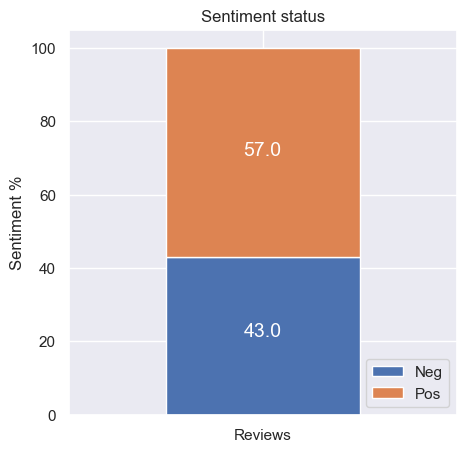

In [152]:
senti = df_token[['id', 'sentiment']]
senti.columns = ['Reviews', 'sentiment']
sentiment_total = senti.groupby(senti['sentiment']).count()
sentiment_percentage = sentiment_total / sentiment_total.sum() * 100
plot_stacked_bars(sentiment_percentage.transpose(), "Sentiment status", (5, 5), legend_="lower right")

From the figure above, we can see that out of 1000 reviews analysed, about 57% were positive and 43% were negative. some of the reviews were also neutral.